<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" width=160px align="left" />

## [課程講義下載](http://lccn.io/TR0q2B)

### <span style="color:red ">有時候，你可能希望拿到指標的數據資料，可以進一步計算...
----
 ### 這一節，我們就來講解一下，你怎麼拿到指標資料

### <span style="color:red ">以下是我們需要的量化分析套件:

### 如果你在Jupyter的環境
----
   ### 請參考[連結](https://medium.com/ai%E8%82%A1%E4%BB%94/%E7%94%A8-python-%E5%BF%AB%E9%80%9F%E8%A8%88%E7%AE%97-158-%E7%A8%AE%E6%8A%80%E8%A1%93%E6%8C%87%E6%A8%99-26f9579b8f3a)
---
### [Mac的安裝方式](https://blog.csdn.net/michael_wgy_/article/details/104591939)

### <span style="color:red ">1.工具導進來

In [3]:
import numpy as np
import pandas as pd
import talib

### <span style="color:red ">先了解一下TA-Lib可以提供多少火力

In [5]:
# 透過『get_functions』語法，查看 TA-Lib 提供的所有技術指標的代碼
all_ta_label = talib.get_functions()
# 看一下清單
all_ta_label
# 共有 158個功能可以運算(包括指標和一般數學公式應用)
len(all_ta_label)

158

### <span style="color:red ">2.可否分門別類，再說一次...

In [6]:
# 透過『get_function_groups』，取得分類後的技術指標清單
all_ta_groups = talib.get_function_groups()
# 看一下這個字典
all_ta_groups
# 有哪些大類別？
all_ta_groups.keys()

# 查看所有類別的指標數量
table = pd.DataFrame({
            '技術指標類別名稱': list(all_ta_groups.keys()),
            '該類別指標總數': list(map(lambda x: len(x), all_ta_groups.values()))
        })
table

,技術指標類別名稱,該類別指標總數
0,Cycle Indicators,5
1,Math Operators,11
2,Math Transform,15
3,Momentum Indicators,30
4,Overlap Studies,17
5,Pattern Recognition,61
6,Price Transform,4
7,Statistic Functions,9
8,Volatility Indicators,3
9,Volume Indicators,3


In [7]:
# 查看某類別底下的技術指標清單
all_ta_groups['Volume Indicators']

['AD', 'ADOSC', 'OBV']

## <span style="color:red "><準備出發>

### <span style="color:red ">1.要算指標先取得股票資料

In [16]:
import yfinance as yf

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#「YTD」 是「year to date」 的縮寫
# 取得 2330.tw 台積電價量資料

df = yf.download('2330.tw',
period = "2y",
progress=False
)

df = df.reset_index(level=0)
df['Date'] = df['Date'].dt.tz_localize(None)
#下面不要改
###################################################################################################################
df.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"},inplace=True)
df

,Date,open,high,low,close,Adj Close,volume
0,2021-03-29,599.0,602.0,596.0,599.0,575.216980,37884733
1,2021-03-30,600.0,600.0,592.0,597.0,573.296387,33099123
2,2021-03-31,596.0,597.0,587.0,587.0,563.693420,38790886
3,2021-04-01,598.0,602.0,594.0,602.0,578.097900,43091157
4,2021-04-07,614.0,614.0,608.0,610.0,585.780212,24603109
...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177


## <span style="color:red ">2.開始算指標

### <span style="color:red ">2.1 SMA指標

In [8]:
import talib

#close是收盤價的意思
#那如果你不想用收盤價，可以用high或是low 或是open
#timeperiod就是設定sma週期
df['SMA5']=talib.SMA(df['close'], timeperiod=5)
df['SMA10']=talib.SMA(df['close'], timeperiod=10)
df['SMA15']=talib.SMA(df['close'], timeperiod=15)
df['SMA20']=talib.SMA(df['close'], timeperiod=20)
df['SMA60']=talib.SMA(df['close'], timeperiod=60)
df['SMA120']=talib.SMA(df['close'], timeperiod=120)


df.to_excel("SMA指標計算結果.xlsx") 
df


,Date,open,high,low,close,Adj Close,volume,SMA5,SMA10,SMA15,SMA20,SMA60,SMA120
0,2021-03-29,599.0,602.0,596.0,599.0,575.217041,37884733,NaN,NaN,NaN,NaN,NaN,NaN
1,2021-03-30,600.0,600.0,592.0,597.0,573.296387,33099123,NaN,NaN,NaN,NaN,NaN,NaN
2,2021-03-31,596.0,597.0,587.0,587.0,563.693420,38790886,NaN,NaN,NaN,NaN,NaN,NaN
3,2021-04-01,598.0,602.0,594.0,602.0,578.097900,43091157,NaN,NaN,NaN,NaN,NaN,NaN
4,2021-04-07,614.0,614.0,608.0,610.0,585.780212,24603109,599.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,517.0,515.7,517.200000,516.60,501.991667,470.650000
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,523.6,517.3,518.466667,517.70,502.950000,471.162500
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,527.8,519.9,520.000000,519.30,503.925000,471.729167
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,531.6,521.4,520.666667,519.95,504.925000,472.283333


### <span style="color:red ">2.2 EMA指標

In [11]:
import talib
#close是收盤價的意思
#那如果你不想用收盤價，可以用high或是low 或是open

df['EMA5']=talib.EMA(df['close'], timeperiod=5)
df['EMA10']=talib.EMA(df['close'], timeperiod=10)
df['EMA20']=talib.EMA(df['close'], timeperiod=20)
df['EMA60']=talib.EMA(df['close'], timeperiod=60)
df['EMA120']=talib.EMA(df['close'], timeperiod=120)

df.to_excel("EMA指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,EMA5,EMA10,EMA20,EMA60,EMA120
0,2021-03-29,599.0,602.0,596.0,599.0,575.216919,37884733,NaN,NaN,NaN,NaN,NaN
1,2021-03-30,600.0,600.0,592.0,597.0,573.296387,33099123,NaN,NaN,NaN,NaN,NaN
2,2021-03-31,596.0,597.0,587.0,587.0,563.693359,38790886,NaN,NaN,NaN,NaN,NaN
3,2021-04-01,598.0,602.0,594.0,602.0,578.097778,43091157,NaN,NaN,NaN,NaN,NaN
4,2021-04-07,614.0,614.0,608.0,610.0,585.780273,24603109,599.000000,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,520.466692,518.046225,517.462340,504.746227,494.550755
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,526.311128,521.674184,519.418307,505.836514,495.268924
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,530.540752,524.824332,521.283231,506.923842,495.991752
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,530.693835,525.947181,522.208637,507.713224,496.570400


### <span style="color:red ">2.3 MACD指標

In [13]:
import talib

#綠色的部分是可以改的
#fastperiod 和 slowperiod就是你算dif的短期和長期的兩個數字(12,26)
#signalperiod 就是你算macd的EMA週期 9

macd, signal, hist = talib.MACD(df['close'].values, fastperiod=12, slowperiod=26, signalperiod=9)
df['MACD-紅線'] = macd
df['MACD-藍線'] = signal
df['紅線-藍線'] = hist

df.to_excel("MACD指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,MACD-紅線,MACD-藍線,紅線-藍線
0,2021-03-29,599.0,602.0,596.0,599.0,575.216980,37884733,NaN,NaN,NaN
1,2021-03-30,600.0,600.0,592.0,597.0,573.296387,33099123,NaN,NaN,NaN
2,2021-03-31,596.0,597.0,587.0,587.0,563.693420,38790886,NaN,NaN,NaN
3,2021-04-01,598.0,602.0,594.0,602.0,578.097839,43091157,NaN,NaN,NaN
4,2021-04-07,614.0,614.0,608.0,610.0,585.780212,24603109,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,1.404730,1.262607,0.142122
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,2.907076,1.591501,1.315575
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,4.130770,2.099355,2.031415
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,4.404254,2.560335,1.843920


### <span style="color:red ">2.4 RSI指標

In [15]:
import talib

#close是收盤價的意思
#那如果你不想用收盤價，可以用high或是low 或是open
#timeperiod就是設定RSI的計算週期
df['RSI5'] = talib.RSI(df['close'], timeperiod=5)
df['RSI10'] = talib.RSI(df['close'], timeperiod=10)
df['RSI20'] = talib.RSI(df['close'], timeperiod=20)
df['RSI60'] = talib.RSI(df['close'], timeperiod=60)
df['RSI240'] = talib.RSI(df['close'], timeperiod=240)

df.to_excel("RSI指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,RSI5,RSI10,RSI20,RSI60,RSI240
0,2021-03-29,599.0,602.0,596.0,599.0,575.216858,37884733,NaN,NaN,NaN,NaN,NaN
1,2021-03-30,600.0,600.0,592.0,597.0,573.296326,33099123,NaN,NaN,NaN,NaN,NaN
2,2021-03-31,596.0,597.0,587.0,587.0,563.693420,38790886,NaN,NaN,NaN,NaN,NaN
3,2021-04-01,598.0,602.0,594.0,602.0,578.097839,43091157,NaN,NaN,NaN,NaN,NaN
4,2021-04-07,614.0,614.0,608.0,610.0,585.780212,24603109,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,73.221480,62.347361,57.802788,54.401698,50.099886
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,76.859275,65.135089,59.344106,54.918326,50.246099
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,77.619363,65.699432,59.654356,55.021974,50.275360
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,58.427924,57.435562,56.052320,54.011707,50.038941


### <span style="color:red ">2.5 布林通道(Bollinger Bands，BBands)

In [17]:
import talib

#close是收盤價的意思
#那如果你不想用收盤價，可以用high或是low 或是open
#timeperiod是20MA 的意思，所以如果你要30MA，記得改30

upper, middle, lower = talib.BBANDS(df['close'], timeperiod=20, nbdevup=2.05196, nbdevdn=2.05196, matype=0)
df['BB-軌道上限'] = upper
df['BB-20MA'] = middle
df['BB-軌道下限'] = lower

df.to_excel("布林通道指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,BB-軌道上限,BB-20MA,BB-軌道下限
0,2021-03-29,599.0,602.0,596.0,599.0,575.216980,37884733,NaN,NaN,NaN
1,2021-03-30,600.0,600.0,592.0,597.0,573.296387,33099123,NaN,NaN,NaN
2,2021-03-31,596.0,597.0,587.0,587.0,563.693420,38790886,NaN,NaN,NaN
3,2021-04-01,598.0,602.0,594.0,602.0,578.097900,43091157,NaN,NaN,NaN
4,2021-04-07,614.0,614.0,608.0,610.0,585.780212,24603109,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
483,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,529.567998,516.60,503.632002
484,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,533.806252,517.70,501.593748
485,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,537.189749,519.30,501.410251
486,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,538.570618,519.95,501.329382


### <span style="color:red ">2.X 萬用版本
----
## [指標總覽](https://github.com/HuaRongSAO/talib-document)

### <span style="color:red ">先把資料讀進來

In [25]:
import yfinance as yf

# valid periods: 1d,5d,1mo,3mo,6mo,1y,2y,5y,10y,ytd,max
#「YTD」 是「year to date」 的縮寫
# 取得 2330.tw 台積電價量資料

df = yf.download('2330.tw',
period = "5y",
progress=False
)

df = df.reset_index(level=0)
df['Date'] = df['Date'].dt.tz_localize(None)
df.rename(columns={"Open": "open", "High": "high", "Low": "low", "Close": "close", "Volume": "volume"},inplace=True)
df

,Date,open,high,low,close,Adj Close,volume
0,2018-03-28,247.5,248.0,244.0,245.0,209.628296,29637411
1,2018-03-29,243.0,247.0,242.5,244.0,208.772690,36165345
2,2018-03-30,247.5,249.5,246.0,246.0,210.483917,16996346
3,2018-04-02,248.5,249.0,245.0,246.5,210.911743,17696003
4,2018-04-03,243.0,244.5,242.0,244.0,208.772690,35813944
...,...,...,...,...,...,...,...
1212,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987
1213,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246
1214,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240
1215,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177


### <span style="color:red ">如果你目標公式只有一個輸出結果...

In [20]:
import talib

#下面不要改#################
open=df['open']
high=df['high']
low=df['low']
close=df['close']
volume=df['volume']
###########################




#real =talib.ADOSC(high, low, close, volume, fastperiod=3, slowperiod=10)
real = talib.HT_TRENDLINE(close)

##########################################################
#如果你選的指標只有一個輸出結果，用下面這個
#real =talib.CCI(high, low, close, timeperiod=14)

##########################################################
#下面欄位請改指標名稱
df['HT_TRENDLINE'] =real
df.to_excel("指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,HT_TRENDLINE
0,2018-03-28,247.5,248.0,244.0,245.0,209.628265,29637411,NaN
1,2018-03-29,243.0,247.0,242.5,244.0,208.772675,36165345,NaN
2,2018-03-30,247.5,249.5,246.0,246.0,210.483948,16996346,NaN
3,2018-04-02,248.5,249.0,245.0,246.5,210.911728,17696003,NaN
4,2018-04-03,243.0,244.5,242.0,244.0,208.772675,35813944,NaN
...,...,...,...,...,...,...,...,...
1212,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,517.255287
1213,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,517.147421
1214,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,517.753247
1215,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,518.786277


In [22]:
import talib

#下面不要改#################
open=df['open']
high=df['high']
low=df['low']
close=df['close']
volume=df['volume']
###########################


#integer = talib.CDLGRAVESTONEDOJI(open, high, low, close)
integer = talib.CDL3BLACKCROWS(open, high, low, close)



##########################################################
#如果你選的指標只有一個輸出結果，用下面這個
#real =talib.CCI(high, low, close, timeperiod=14)

##########################################################
#下面欄位請改指標名稱
df['三只乌鸦'] =integer
df.to_excel("指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,三只乌鸦
0,2018-03-28,247.5,248.0,244.0,245.0,209.628296,29637411,0
1,2018-03-29,243.0,247.0,242.5,244.0,208.772675,36165345,0
2,2018-03-30,247.5,249.5,246.0,246.0,210.483917,16996346,0
3,2018-04-02,248.5,249.0,245.0,246.5,210.911774,17696003,0
4,2018-04-03,243.0,244.5,242.0,244.0,208.772675,35813944,0
...,...,...,...,...,...,...,...,...
1212,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,0
1213,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,0
1214,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,0
1215,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,0


## [CCI怎麼算](https://www.moneydj.com/kmdj/wiki/wikiviewer.aspx?keyid=fd7eccee-7318-472b-8daf-fa828e763cb2)
## [CCI怎麼操作](https://kknews.cc/zh-tw/invest/6a8zz4l.html)


### <span style="color:red ">如果你目標公式有多個輸出結果...

In [27]:
import talib

#下面不要改##########################
open=df['open']
high=df['high']
low=df['low']
close=df['close']
volume=df['volume']
###################################



#如果你選的指標有多個輸出結果，用下面這個
#剪貼範例示範


#[aroondown, aroonup]=talib.AROON(high, low, timeperiod=14)
[slowk, slowd] = talib.STOCH(high, low, close, fastk_period=5, slowk_period=3, slowk_matype=0, slowd_period=3, slowd_matype=0)




#輸出結果貼在前面
#[aroondown, aroonup] =talib.AROON(high, low, timeperiod=14)

#把每一個結果分出來

#df['aroondown'], df['aroonup'] = [aroondown, aroonup]
df['slowk'],df['slowd']=[slowk, slowd]
##########################################################
df.to_excel("指標計算結果.xlsx") 
df

,Date,open,high,low,close,Adj Close,volume,slowk,slowd
0,2018-03-28,247.5,248.0,244.0,245.0,209.628296,29637411,NaN,NaN
1,2018-03-29,243.0,247.0,242.5,244.0,208.772690,36165345,NaN,NaN
2,2018-03-30,247.5,249.5,246.0,246.0,210.483917,16996346,NaN,NaN
3,2018-04-02,248.5,249.0,245.0,246.5,210.911743,17696003,NaN,NaN
4,2018-04-03,243.0,244.5,242.0,244.0,208.772690,35813944,NaN,NaN
...,...,...,...,...,...,...,...,...,...
1212,2023-03-22,524.0,533.0,524.0,533.0,533.000000,42385987,83.333333,73.809524
1213,2023-03-23,528.0,539.0,528.0,538.0,538.000000,26728246,96.469622,87.712096
1214,2023-03-24,536.0,539.0,535.0,539.0,539.000000,21926240,98.850575,92.884510
1215,2023-03-27,533.0,536.0,531.0,531.0,531.000000,16111177,88.974032,94.764743


## [阿隆怎麼看](https://kknews.cc/zh-tw/invest/jlnznbl.html)

## [阿隆怎麼用](https://iamernie8199.blogspot.com/2020/08/aroon.html)

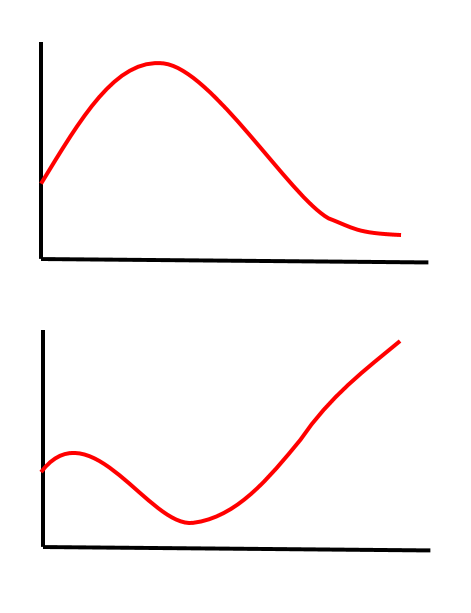